Step 2: Load and Preprocess the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

In [6]:
# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Display the first few rows of the dataset
print("Dataset loaded successfully. Here's a preview:")
print(df.head())

Dataset loaded successfully. Here's a preview:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


 Clean the Dataset


In [7]:
# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

# Rename columns for clarity
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)

# Encode labels: Spam = 1, Ham = 0
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Check the updated dataframe
print("Dataset after cleaning:")
print(df.head())

Dataset after cleaning:
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Visualize Class Distribution

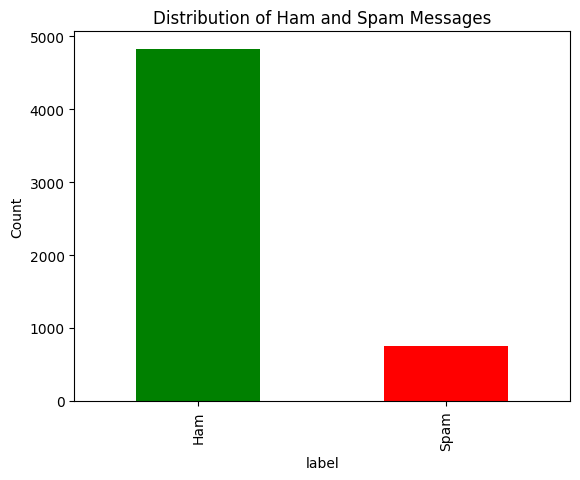

In [8]:
# Visualize the count of spam vs ham
class_counts = df['label'].value_counts()
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of Ham and Spam Messages")
plt.xticks(ticks=[0, 1], labels=["Ham", "Spam"])
plt.ylabel("Count")
plt.show()

Step 3: Train the Model

Code: Split the Data

In [9]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

print("Training data and test data split successfully.")

Training data and test data split successfully.


Code: Transform Text Data

In [10]:
# Convert text to numerical data using CountVectorizer
vectorizer = CountVectorizer()
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)

print("Text data converted to numerical format.")

Text data converted to numerical format.


Code: Train Logistic Regression Model

In [11]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train_vect, y_train)

print("Model training completed.")

Model training completed.


Code: Evaluate the Model

In [12]:
# Predict on test data
y_pred = model.predict(x_test_vect)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
print(f"F1 Score of the model: {f1}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

F1 Score of the model: 0.9090909090909092
Confusion Matrix:
[[1450    3]
 [  34  185]]
